In [5]:
#import pandas and datetime
import pandas as pd
import datetime

In [17]:
#import google data, create datetime index
data = pd.read_csv('googl.csv', parse_dates=[0], index_col='Date')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1761 non-null   float64
 1   High       1761 non-null   float64
 2   Low        1761 non-null   float64
 3   Close      1761 non-null   float64
 4   Adj Close  1761 non-null   float64
 5   Volume     1761 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.3 KB


In [22]:
#check the columns
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [26]:
#drop unecessary columns
data = data.drop(columns=['Open', 'High', 'Low','Adj Close', 'Volume'])

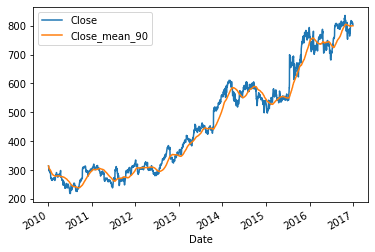

In [33]:
#90 day rolling mean and concatenate series or dataframe along axix=1
r90=data.rolling (window='90D').mean()
data.join(r90.add_suffix('_mean_90')).plot()

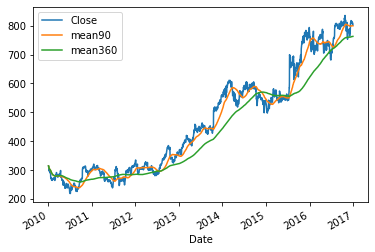

In [35]:
#adding the 360 day rolling mean
data['mean90']=r90
r360 = data['Close'].rolling(window='360D').mean()
data['mean360'] = r360
data.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D86AA2F10>,
      dtype=object)

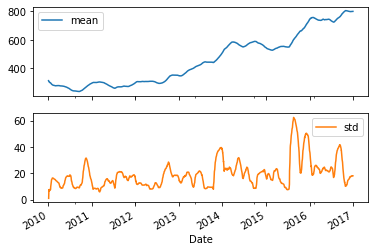

In [37]:
#multiple rolling metrics, mean and std
r= data.Close.rolling ('90D').agg(['mean','std'])
r.plot(subplots=True)

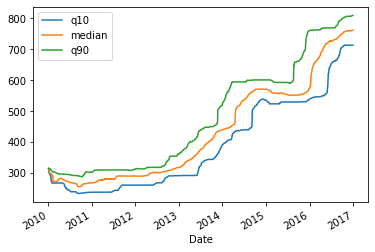

In [40]:
#360 day
rolling =data.Close.rolling('360D')
#quantile 10%
q10 = rolling.quantile(0.1).to_frame('q10')
#360 day rolling median
median = rolling.median().to_frame('median')
#quantile 10%
q90 = rolling.quantile(0.9).to_frame('q90')

pd.concat([q10, median, q90], axis=1).plot()